### Backgroud:

_"If there is a new Starbuck store opening in the area, you can expect a growth in the area's house price"_

There is this saying in countries I stayed before. This projecct is to examine if there exist a venue effect on Manhattan house price. The people who will have interest in this topic will be potential real estate investors and home buyers.

### Data being used:
* 1. Fousquare API for finding venues in a district
* 2. NYC house price from 2013 - 2018 download from https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page, there is a reason that 2019 - 2020 is not include here, due to COVID - 19.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nyc = pd.read_csv('data/nyc16.csv')

First read the nyc data and extract Manhattan data

In [4]:
man = nyc[nyc.borough == 1]

In [5]:
man.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93745 entries, 0 to 93744
Data columns (total 27 columns):
borough                           93745 non-null int64
neighborhood                      93745 non-null object
building_class_category           93745 non-null object
tax_class_at_present              93745 non-null object
block                             93745 non-null int64
lot                               93745 non-null int64
building_class_at_present         93745 non-null object
address                           93745 non-null object
apartment_number                  93745 non-null object
zip_code                          93745 non-null float64
residential_units                 93745 non-null int64
commercial_units                  93745 non-null int64
total_units                       93745 non-null int64
land_sqft                         93745 non-null float64
gross_sqft                        93745 non-null float64
year_built                        93745 non-null float

In [6]:
man.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_sqft', 'gross_sqft',
       'year_built', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'sale_price', 'sale_date', 'month',
       'year', 'borough_name', 'house_type', 'price_per_land_sqft',
       'price_per_gross_sqft', 'year_built_decade'],
      dtype='object')

In [7]:
man1 = man[['neighborhood', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_sqft', 'gross_sqft',
       'year_built','sale_price', 'sale_date', 'month',
       'year', 'borough_name', 'house_type', 'price_per_land_sqft',
       'price_per_gross_sqft', 'year_built_decade']]



In [8]:
man1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93745 entries, 0 to 93744
Data columns (total 17 columns):
neighborhood            93745 non-null object
zip_code                93745 non-null float64
residential_units       93745 non-null int64
commercial_units        93745 non-null int64
total_units             93745 non-null int64
land_sqft               93745 non-null float64
gross_sqft              93745 non-null float64
year_built              93745 non-null float64
sale_price              93745 non-null float64
sale_date               93745 non-null object
month                   93745 non-null int64
year                    93745 non-null int64
borough_name            93745 non-null object
house_type              93745 non-null object
price_per_land_sqft     93745 non-null float64
price_per_gross_sqft    93745 non-null float64
year_built_decade       93745 non-null int64
dtypes: float64(7), int64(6), object(4)
memory usage: 12.9+ MB


In [9]:
man1.house_type.value_counts()

coop                    40706
condo                   36580
apartment_not_define     7309
others                   5639
house                    3511
Name: house_type, dtype: int64

(0.0, 20000000.0)

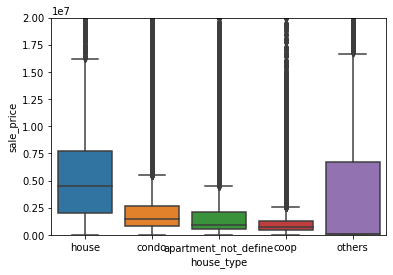

In [10]:
sns.boxplot(man1.house_type, man1.sale_price)
axes = plt.gca()

axes.set_ylim([0,20000000])

Gonna only keep condo, house, coop

In [11]:
man2 = man1[man1.house_type != 'apartment_not_define']

In [12]:
man3 = man2[man1.house_type != 'others']

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [13]:
man3.house_type.unique()

array(['house', 'condo', 'coop'], dtype=object)

In [14]:
man4 = man3.groupby('neighborhood').mean()

In [15]:
man4.columns

Index(['zip_code', 'residential_units', 'commercial_units', 'total_units',
       'land_sqft', 'gross_sqft', 'year_built', 'sale_price', 'month', 'year',
       'price_per_land_sqft', 'price_per_gross_sqft', 'year_built_decade'],
      dtype='object')

In [16]:
man5 = man4[['residential_units', 'commercial_units', 'total_units',
       'land_sqft', 'gross_sqft', 'sale_price']]

In [17]:
man5['price_per_sqft'] = man5.sale_price / man5.gross_sqft

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
man5

,residential_units,commercial_units,total_units,land_sqft,gross_sqft,sale_price,price_per_sqft
neighborhood,,,,,,,
alphabet_city,1.449768,0.041731,1.491499,293.629057,845.782071,1.510256e+06,1785.632869
chelsea,0.842932,0.014398,0.857330,401.985340,377.570419,2.146299e+06,5684.499235
chinatown,1.100304,0.042553,1.142857,606.379939,361.507599,1.789275e+06,4949.480611
civic_center,0.829980,0.022133,0.852113,933.110664,254.441650,4.217584e+06,16575.840915
clinton,1.136054,0.004762,1.140816,1012.003401,433.540136,1.597771e+06,3685.404575
east_village,1.563615,0.058264,1.621879,2927.256837,1752.882283,1.998918e+06,1140.360560
fashion,1.002188,0.067834,1.070022,339.695842,506.345733,2.323921e+06,4589.592632
financial,0.961986,0.005814,0.967800,39.481216,117.191413,1.366303e+06,11658.733247
flatiron,0.866329,0.017215,0.883544,139.771646,356.751899,3.031761e+06,8498.234517


In [19]:
man6 = man5[['price_per_sqft']]

In [20]:
man6

,price_per_sqft
neighborhood,
alphabet_city,1785.632869
chelsea,5684.499235
chinatown,4949.480611
civic_center,16575.840915
clinton,3685.404575
east_village,1140.360560
fashion,4589.592632
financial,11658.733247
flatiron,8498.234517


Now I wanna combine the manhattan neighbourhood data and use the FoursquareAPI

In [21]:
!conda install -c conda-forge geopy --yes


Solving environment: done

## Package Plan ##

  environment location: /Users/justin/anaconda3

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-h033912b_0
  certifi                anaconda::certifi-2020.6.20-py37_0 --> conda-forge::certifi-2020.12.5-py37hf985489_0
  openssl               anaconda::openssl-1.1.1h-haf1e3a3_0 --> conda-forge::openssl-1.1.1i-h35c211d_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [22]:
!conda install -c conda-forge folium=0.5.0 --yes 


Solving environment: done

# All requested packages already installed.



In [23]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [24]:
conda install -c anaconda wget


Solving environment: done

## Package Plan ##

  environment location: /Users/justin/anaconda3

  added / updated specs:
    - wget


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2020.12.5-py37hf~ --> anaconda::certifi-2020.6.20-py37_0
  openssl            conda-forge::openssl-1.1.1i-h35c211d_0 --> anaconda::openssl-1.1.1h-haf1e3a3_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [25]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json


In [26]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [27]:
newyork_data


{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [28]:
neighborhoods_data = newyork_data['features']


In [29]:
neighborhoods_data[0]


{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [30]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [31]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [32]:
manhattan_data.Neighborhood = manhattan_data.Neighborhood.str.lower()


In [33]:
manhattan_data.Neighborhood = manhattan_data.Neighborhood.str.replace(' ','_')

In [34]:
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,marble_hill,40.876551,-73.910660
1,Manhattan,chinatown,40.715618,-73.994279
2,Manhattan,washington_heights,40.851903,-73.936900
3,Manhattan,inwood,40.867684,-73.921210
4,Manhattan,hamilton_heights,40.823604,-73.949688
5,Manhattan,manhattanville,40.816934,-73.957385
6,Manhattan,central_harlem,40.815976,-73.943211
7,Manhattan,east_harlem,40.792249,-73.944182
8,Manhattan,upper_east_side,40.775639,-73.960508
9,Manhattan,yorkville,40.775930,-73.947118


In [35]:
man6.reset_index()

,neighborhood,price_per_sqft
0,alphabet_city,1785.632869
1,chelsea,5684.499235
2,chinatown,4949.480611
3,civic_center,16575.840915
4,clinton,3685.404575
5,east_village,1140.360560
6,fashion,4589.592632
7,financial,11658.733247
8,flatiron,8498.234517
9,gramercy,3961.336641


In [36]:
man6.to_csv('data/man6.csv')

In [75]:
man6 = pd.read_csv('data/man6.csv')

In [76]:
import numpy as np

In [77]:
man6.price_per_sqft.astype(str)

0     1785.6328686216355
1      5684.499234912663
2      4949.480611421269
3     16575.840914931894
4       3685.40457458293
5      1140.360559879634
6      4589.592631806396
7     11658.733246832544
8      8498.234516772285
9      3961.336640590575
10     3803.125523678852
11    7301.8199185716285
12     849.8704789761041
13      621.602881591617
14     608.6142630370442
15     431.7330806121682
16     426.7804285832427
17     676.4472583796123
18     5674.958927772827
19     5914.527958620602
20     3867.601338018651
21                1875.0
22     1526.782533268142
23     25485.69637267295
24    4289.8419450133115
25     9250.620233148304
26    4517.2169228142075
27     4864.200580644481
28     5105.177131444264
29     9615.333824556788
30     9017.367941688195
31    10007.625357367271
32     8927.958947365816
33     7249.771217143946
34     10954.61043605478
35     8826.639302599491
36    2350.4273569457064
37    2745.0733246161967
38     519.2366327919867
39     609.8699661105163


In [78]:
new_row = {'neighborhood':'upper_east_side', 'price_per_sqft':(np.sum(man6.price_per_sqft.iloc[32:35])/3)}
new_row1 = {'neighborhood':'upper_west_side', 'price_per_sqft':(np.sum(man6.price_per_sqft.iloc[35:38])/3)}
new_row2 = {'neighborhood':'washington_heights', 'price_per_sqft':(np.sum(man6.price_per_sqft.iloc[38:40])/2)}
#append row to the dataframe
man6 = man6.append(new_row, ignore_index=True)
man6 = man6.append(new_row1, ignore_index=True)
man6 = man6.append(new_row2, ignore_index=True)

In [79]:
man7 = man6.drop(man6.index[32:40])

In [80]:
manhattan_data.columns = manhattan_data.columns.str.lower()

In [81]:
manhattan_data.columns

Index(['borough', 'neighborhood', 'latitude', 'longitude'], dtype='object')

In [84]:
result = man7.merge(manhattan_data, how='inner', on='neighborhood')




In [87]:
result

,neighborhood,price_per_sqft,borough,latitude,longitude
0,chelsea,5684.499235,Manhattan,40.744035,-74.003116
1,chinatown,4949.480611,Manhattan,40.715618,-73.994279
2,civic_center,16575.840915,Manhattan,40.715229,-74.005415
3,clinton,3685.404575,Manhattan,40.759101,-73.996119
4,east_village,1140.360560,Manhattan,40.727847,-73.982226
5,flatiron,8498.234517,Manhattan,40.739673,-73.990947
6,gramercy,3961.336641,Manhattan,40.737210,-73.981376
7,inwood,426.780429,Manhattan,40.867684,-73.921210
8,little_italy,5914.527959,Manhattan,40.719324,-73.997305
9,lower_east_side,3867.601338,Manhattan,40.717807,-73.980890


In [88]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [89]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(result['latitude'], result['longitude'], result['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [92]:
neighborhood_latitude = result.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = result.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = result.loc[0, 'neighborhood'] # neighborhood name

In [93]:
CLIENT_ID = 'BKBBTVJXXGL33YSAOFFEINNLT2WMM4JA42ZBGWLVHRABCOLQ' 
CLIENT_SECRET = 'T12DXE4NTQXUP3FRZQOGNX2WPVPOSOTW3QOFGY3LED5MJGTZ'
VERSION = '20180605' 
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BKBBTVJXXGL33YSAOFFEINNLT2WMM4JA42ZBGWLVHRABCOLQ
CLIENT_SECRET:T12DXE4NTQXUP3FRZQOGNX2WPVPOSOTW3QOFGY3LED5MJGTZ


In [94]:
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fe517f68549cf75f7445718'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Chelsea',
  'headerFullLocation': 'Chelsea, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 143,
  'suggestedBounds': {'ne': {'lat': 40.74853471124798,
    'lng': -73.9971878669578},
   'sw': {'lat': 40.73953470224797, 'lng': -74.00904480249847}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5699bc8e498ed04928d4ee79',
       'name': 'Milk & Hops Chelsea',
       'location': {'address': '166 9th Ave',
        'crossStreet': 'btwn W 20th & 21st St',
        'lat': 40.74475130697248,
        'lng': -74.0

In [95]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [96]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Milk & Hops Chelsea,Beer Bar,40.744751,-74.002595
1,Dil-e Punjab Deli,Indian Restaurant,40.744845,-74.002528
2,Bathtub Gin,Speakeasy,40.743638,-74.003290
3,TAO Downtown,Asian Restaurant,40.742539,-74.003812
4,Billy's Bakery,Cupcake Shop,40.745374,-74.002119


In [97]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [99]:
manhattan_venues = getNearbyVenues(names=result['neighborhood'],
                                   latitudes=result['latitude'],
                                   longitudes=result['longitude'])

chelsea
chinatown
civic_center
clinton
east_village
flatiron
gramercy
inwood
little_italy
lower_east_side
manhattan_valley
morningside_heights
murray_hill
roosevelt_island
soho
tribeca
upper_east_side
upper_west_side
washington_heights


In [100]:
manhattan_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
chelsea,100,100,100,100,100,100
chinatown,100,100,100,100,100,100
civic_center,100,100,100,100,100,100
clinton,100,100,100,100,100,100
east_village,100,100,100,100,100,100
flatiron,100,100,100,100,100,100
gramercy,86,86,86,86,86,86
inwood,57,57,57,57,57,57
little_italy,100,100,100,100,100,100


In [101]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Auto Workshop,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Skate Park,Snack Place,Soccer Field,Social Club,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,chelsea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [102]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Auto Workshop,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Skate Park,Snack Place,Soccer Field,Social Club,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,chelsea,0.000000,0.040000,0.00,0.00,0.000000,0.000000,0.050000,0.010000,0.01,0.00,0.00,0.000000,0.00,0.010000,0.060000,0.000000,0.020000,0.000000,0.000000,0.000000,0.010000,0.00,0.00,0.000000,0.00,0.000000,0.010000,0.010

In [103]:
num_top_venues = 10

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----chelsea----
                 venue  freq
0          Coffee Shop  0.09
1               Bakery  0.06
2          Art Gallery  0.05
3  American Restaurant  0.04
4   Italian Restaurant  0.03
5                 Café  0.03
6    French Restaurant  0.03
7       Ice Cream Shop  0.03
8            Wine Shop  0.03
9            Nightclub  0.02


----chinatown----
                 venue  freq
0   Chinese Restaurant  0.08
1               Bakery  0.06
2         Cocktail Bar  0.05
3  American Restaurant  0.04
4                  Spa  0.03
5  Shanghai Restaurant  0.03
6         Optical Shop  0.03
7          Coffee Shop  0.02
8       Ice Cream Shop  0.02
9             Boutique  0.02


----civic_center----
                  venue  freq
0           Coffee Shop  0.07
1                   Spa  0.05
2          Cocktail Bar  0.05
3     French Restaurant  0.04
4  Gym / Fitness Center  0.04
5                 Hotel  0.04
6             Hotel Bar  0.03
7                  Park  0.03
8   American Restaurant  0.03
9  

In [104]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [127]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,chelsea,Coffee Shop,Bakery,Art Gallery,American Restaurant,French Restaurant,Wine Shop,Café,Ice Cream Shop,Italian Restaurant,Nightclub
1,chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Shanghai Restaurant,Optical Shop,Spa,Coffee Shop,Ice Cream Shop,Hotpot Restaurant
2,civic_center,Coffee Shop,Cocktail Bar,Spa,French Restaurant,Gym / Fitness Center,Hotel,Yoga Studio,Sushi Restaurant,American Restaurant,Hotel Bar
3,clinton,Theater,Gym / Fitness Center,American Restaurant,Italian Restaurant,Coffee Shop,Gym,Wine Shop,Hotel,Sandwich Place,Spa
4,east_village,Bar,Mexican Restaurant,Pizza Place,Ice Cream Shop,Cocktail Bar,Vietnamese Restaurant,Coffee Shop,Salon / Barbershop,Vegetarian / Vegan Restaurant,Korean Restaurant
5,flatiron,Italian Restaurant,American Restaurant,Japanese Restaurant,New American Restaurant,Coffee Shop,Spa,Gym / Fitness Center,Salon / Barbershop,Furniture / Home Store,Mediterranean Restaurant
6,gramercy,Bar,Bagel Shop,Pizza Place,Italian Restaurant,Coffee Shop,Thrift / Vintage Store,American Restaurant,Playground,Cocktail Bar,Mexican Restaurant
7,inwood,Mexican Restaurant,Café,Restaurant,Lounge,Deli / Bodega,Frozen Yogurt Shop,Caribbean Restaurant,Chinese Restaurant,Bakery,Pizza Place
8,little_italy,Italian Restaurant,Bakery,Café,Mediterranean Restaurant,Chinese Restaurant,Sandwich Place,Salon / Barbershop,Bubble Tea Shop,Clothing Store,Cocktail Bar
9,lower_east_side,Café,Bakery,Japanese Restaurant,Ramen Restaurant,Chinese Restaurant,Art Gallery,Coffee Shop,Rock Club,Diner,Dessert Shop


In [200]:
# set number of clusters
kclusters = 3

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 2], dtype=int32)

In [201]:
neighborhoods_venues_sorted.columns.str.lower()

Index(['cluster labels', 'neighborhood', '1st most common venue',
       '2nd most common venue', '3rd most common venue',
       '4th most common venue', '5th most common venue',
       '6th most common venue', '7th most common venue',
       '8th most common venue', '9th most common venue',
       '10th most common venue'],
      dtype='object')

In [202]:
man8 = neighborhoods_venues_sorted.merge(result, how='inner', on=result.neighborhood)

In [203]:
man8

,key_0,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,neighborhood,price_per_sqft,borough,latitude,longitude
0,chelsea,0,chelsea,Coffee Shop,Bakery,Art Gallery,American Restaurant,French Restaurant,Wine Shop,Café,Ice Cream Shop,Italian Restaurant,Nightclub,chelsea,5684.499235,Manhattan,40.744035,-74.003116
1,chinatown,2,chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Shanghai Restaurant,Optical Shop,Spa,Coffee Shop,Ice Cream Shop,Hotpot Restaurant,chinatown,4949.480611,Manhattan,40.715618,-73.994279
2,civic_center,0,civic_center,Coffee Shop,Cocktail Bar,Spa,French Restaurant,Gym / Fitness Center,Hotel,Yoga Studio,Sushi Restaurant,American Restaurant,Hotel Bar,civic_center,16575.840915,Manhattan,40.715229,-74.005415
3,clinton,0,clinton,Theater,Gym / Fitness Center,American Restaurant,Italian Restaurant,Coffee Shop,Gym,Wine Shop,Hotel,Sandwich Place,Spa,clinton,3685.404575,Manhattan,40.759101,-73.996119
4,east_village,2,east_village,Bar,Mexican Restaurant,Pizza Place,Ice Cream Shop,Cocktail Bar,Vietnamese Restaurant,Coffee Shop,Salon / Barbershop,Vegetarian / Vegan Restaurant,Korean Restaurant,east_village,1140.360560,Manhattan,40.727847,-73.982226
5,flatiron,0,flatiron,Italian Restaurant,American Restaurant,Japanese Restaurant,New American Restaurant,Coffee Shop,Spa,Gym / Fitness Center,Salon / Barbershop,Furniture / Home Store,Mediterranean Restaurant,flatiron,8498.234517,Manhattan,40.739673,-73.990947
6,gramercy,2,gramercy,Bar,Bagel Shop,Pizza Place,Italian Restaurant,Coffee Shop,Thrift / Vintage Store,American Restaurant,Playground,Cocktail Bar,Mexican Restaurant,gramercy,3961.336641,Manhattan,40.737210,-73.981376
7,inwood,3,inwood,Mexican Restaurant,Café,Restaurant,Lounge,Deli / Bodega,Frozen Yogurt Shop,Caribbean Restaurant,Chinese Restaurant,Bakery,Pizza Place,inwood,426.780429,Manhattan,40.867684,-73.921210
8,little_italy,3,little_italy,Italian Restaurant,Bakery,Café,Mediterranean Restaurant,Chinese Restaurant,Sandwich Place,Salon / Barbershop,Bubble Tea Shop,Clothing Store,Cocktail Bar,little_italy,5914.527959,Manhattan,40.719324,-73.997305
9,lower_east_side,3,lower_east_side,Café,Bakery,Japanese Restaurant,Ramen Restaurant,Chinese Restaurant,Art Gallery,Coffee Shop,Rock Club,Diner,Dessert Shop,lower_east_side,3867.601338,Manhattan,40.717807,-73.980890


In [204]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(man8['latitude'], man8['longitude'], man8['neighborhood'], man8['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [205]:
comparison_price_cluster = man8[['price_per_sqft','Cluster Labels','neighborhood']]

In [206]:
comparison_price_cluster.sort_values(by = 'price_per_sqft')

,price_per_sqft,Cluster Labels,neighborhood
7,426.780429,3,inwood
18,564.553299,3,washington_heights
4,1140.360560,2,east_village
10,1526.782533,2,manhattan_valley
3,3685.404575,0,clinton
9,3867.601338,3,lower_east_side
6,3961.336641,2,gramercy
11,4517.216923,0,morningside_heights
17,4640.713328,2,upper_west_side
12,4864.200581,0,murray_hill


In [216]:
man8.loc[man8['Cluster Labels'] == 0, man8.columns[[1] + list(range(2, man8.shape[1]))]]


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,neighborhood,price_per_sqft,borough,latitude,longitude
0,0,chelsea,Coffee Shop,Bakery,Art Gallery,American Restaurant,French Restaurant,Wine Shop,Café,Ice Cream Shop,Italian Restaurant,Nightclub,chelsea,5684.499235,Manhattan,40.744035,-74.003116
2,0,civic_center,Coffee Shop,Cocktail Bar,Spa,French Restaurant,Gym / Fitness Center,Hotel,Yoga Studio,Sushi Restaurant,American Restaurant,Hotel Bar,civic_center,16575.840915,Manhattan,40.715229,-74.005415
3,0,clinton,Theater,Gym / Fitness Center,American Restaurant,Italian Restaurant,Coffee Shop,Gym,Wine Shop,Hotel,Sandwich Place,Spa,clinton,3685.404575,Manhattan,40.759101,-73.996119
5,0,flatiron,Italian Restaurant,American Restaurant,Japanese Restaurant,New American Restaurant,Coffee Shop,Spa,Gym / Fitness Center,Salon / Barbershop,Furniture / Home Store,Mediterranean Restaurant,flatiron,8498.234517,Manhattan,40.739673,-73.990947
11,0,morningside_heights,Coffee Shop,Park,American Restaurant,Bookstore,Café,Deli / Bodega,Burger Joint,Tennis Court,Mediterranean Restaurant,Sandwich Place,morningside_heights,4517.216923,Manhattan,40.808000,-73.963896
12,0,murray_hill,Coffee Shop,Hotel,Sandwich Place,Italian Restaurant,Japanese Restaurant,Bar,Burger Joint,American Restaurant,Gym / Fitness Center,Sushi Restaurant,murray_hill,4864.200581,Manhattan,40.748303,-73.978332
14,0,soho,Clothing Store,Coffee Shop,Italian Restaurant,Salon / Barbershop,Sporting Goods Shop,Mediterranean Restaurant,Men's Store,Boutique,Bakery,French Restaurant,soho,9615.333825,Manhattan,40.722184,-74.000657
15,0,tribeca,Park,Italian Restaurant,American Restaurant,Spa,Café,Coffee Shop,Greek Restaurant,Men's Store,Wine Bar,Steakhouse,tribeca,10007.625357,Manhattan,40.721522,-74.010683
16,0,upper_east_side,Italian Restaurant,Coffee Shop,Exhibit,Bakery,Yoga Studio,Juice Bar,Pizza Place,French Restaurant,Boutique,Gym / Fitness Center,upper_east_side,9044.113534,Manhattan,40.775639,-73.960508


In [217]:
man8.loc[man8['Cluster Labels'] == 1, man8.columns[[1] + list(range(2, man8.shape[1]))]]



,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,neighborhood,price_per_sqft,borough,latitude,longitude
13,1,roosevelt_island,Park,Japanese Restaurant,Gym / Fitness Center,Greek Restaurant,Supermarket,Bridge,Bubble Tea Shop,Food & Drink Shop,Soccer Field,Outdoors & Recreation,roosevelt_island,5105.177131,Manhattan,40.76216,-73.949168


In [218]:
man8.loc[man8['Cluster Labels'] == 2, man8.columns[[1] + list(range(2, man8.shape[1]))]]



,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,neighborhood,price_per_sqft,borough,latitude,longitude
1,2,chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Shanghai Restaurant,Optical Shop,Spa,Coffee Shop,Ice Cream Shop,Hotpot Restaurant,chinatown,4949.480611,Manhattan,40.715618,-73.994279
4,2,east_village,Bar,Mexican Restaurant,Pizza Place,Ice Cream Shop,Cocktail Bar,Vietnamese Restaurant,Coffee Shop,Salon / Barbershop,Vegetarian / Vegan Restaurant,Korean Restaurant,east_village,1140.360560,Manhattan,40.727847,-73.982226
6,2,gramercy,Bar,Bagel Shop,Pizza Place,Italian Restaurant,Coffee Shop,Thrift / Vintage Store,American Restaurant,Playground,Cocktail Bar,Mexican Restaurant,gramercy,3961.336641,Manhattan,40.737210,-73.981376
10,2,manhattan_valley,Bar,Coffee Shop,Pizza Place,Playground,Thai Restaurant,Mexican Restaurant,Indian Restaurant,Japanese Restaurant,Hostel,Ice Cream Shop,manhattan_valley,1526.782533,Manhattan,40.797307,-73.964286
17,2,upper_west_side,Italian Restaurant,Bar,Indian Restaurant,Wine Bar,Bakery,French Restaurant,Dessert Shop,Café,Yoga Studio,Seafood Restaurant,upper_west_side,4640.713328,Manhattan,40.787658,-73.977059


In [219]:
man8.loc[man8['Cluster Labels'] == 3, man8.columns[[1] + list(range(2, man8.shape[1]))]]



,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,neighborhood,price_per_sqft,borough,latitude,longitude
7,3,inwood,Mexican Restaurant,Café,Restaurant,Lounge,Deli / Bodega,Frozen Yogurt Shop,Caribbean Restaurant,Chinese Restaurant,Bakery,Pizza Place,inwood,426.780429,Manhattan,40.867684,-73.921210
8,3,little_italy,Italian Restaurant,Bakery,Café,Mediterranean Restaurant,Chinese Restaurant,Sandwich Place,Salon / Barbershop,Bubble Tea Shop,Clothing Store,Cocktail Bar,little_italy,5914.527959,Manhattan,40.719324,-73.997305
9,3,lower_east_side,Café,Bakery,Japanese Restaurant,Ramen Restaurant,Chinese Restaurant,Art Gallery,Coffee Shop,Rock Club,Diner,Dessert Shop,lower_east_side,3867.601338,Manhattan,40.717807,-73.980890
18,3,washington_heights,Café,Spanish Restaurant,Bakery,Grocery Store,Chinese Restaurant,Mobile Phone Shop,Park,New American Restaurant,Bank,Supermarket,washington_heights,564.553299,Manhattan,40.851903,-73.936900


In [213]:
man8.groupby('Cluster Labels').mean()

,price_per_sqft,latitude,longitude
Cluster Labels,,,
0,8054.718829,40.748187,-73.989964
1,5105.177131,40.762160,-73.949168
2,3243.734735,40.753128,-73.979845
3,2693.365756,40.789179,-73.959076
